# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dogImages`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home diretcory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("lfw/*/*"))
dog_files = np.array(glob("dogImages/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


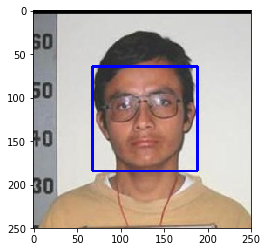

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[111])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
(You can print out your results and/or write your percentages in this cell)

In [4]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.

human,dog = 0,0
for hface,dface in zip(human_files_short, dog_files_short):
    if (face_detector(hface)):
        human += 1
    if (face_detector(dface)):
        dog += 1

print("human={}, dog={}".format(human,dog))


human=99, dog=18


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [ ]:
### (Optional) 
### TODO: Test performance of anotherface detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [5]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [6]:
import PIL.Image
from PIL import Image
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

import torchvision.transforms as transforms

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image

    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
    
    img_transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224), # vgg accepts 224 
        transforms.ToTensor(),
        normalize
    ])
    
    img = img_transform(PIL.Image.open(img_path)).unsqueeze_(0)
    
    if use_cuda:
        img = img.cuda()
    
    VGG16.eval() #to prevent dropout which is relevant during during training. For same reason I've used CenterCrop instead of RandomCrop
    output = VGG16(img)
    return output.data.argmax(dim=1).item() # predicted class index

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [7]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    index = VGG16_predict(img_path)
    return index in range(151, 269) # true/false

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 

What percentage of the images in human_files_short have a detected dog?  __1%__
<br>What percentage of the images in dog_files_short have a detected dog?  __96%__


In [131]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.

fake_dog, real_dog = 0, 0
for human_img,dog_img in zip(human_files_short, dog_files_short):
    #print(human_img)
    fake_dog += dog_detector(human_img)
    real_dog += dog_detector(dog_img)

print("What percentage of the images in human_files_short have a detected dog? ", fake_dog/100)
print("What percentage of the images in dog_files_short have a detected dog? ", real_dog/100)

What percentage of the images in human_files_short have a detected dog?  0.01
What percentage of the images in dog_files_short have a detected dog?  0.96


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

__Answer__:

What percentage of the images in human_files_short have a detected dog?  __2%__
<br>What percentage of the images in dog_files_short have a detected dog?  __95%__

__Conclusion__:
VGG-16 via pytorch performed marginally better than Resnet via keras/tensorFlow-BE. But dataset is too small to draw conclusions.

In [31]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image                  
from keras.applications.resnet50 import preprocess_input, decode_predictions
from tqdm import tqdm

# define ResNet50 model
ResNet50_model = ResNet50(weights='imagenet')


def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(224, 224))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)


def ResNet50_predict_labels(img_path):
    # returns prediction vector for image located at img_path
    img = preprocess_input(path_to_tensor(img_path))
    return np.argmax(ResNet50_model.predict(img))

### returns "True" if a dog is detected in the image stored at img_path
def dog_detector_keras(img_path):
    prediction = ResNet50_predict_labels(img_path)
    return ((prediction <= 268) & (prediction >= 151)) 

human_preds = np.array([1 if dog_detector_keras(x) else 0 for x in human_files_short ])
dog_preds = np.array([1 if dog_detector_keras(x) else 0 for x in dog_files_short ])
print (sum(human_preds),sum(dog_preds))

2 95


---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [8]:
import os
from torchvision import datasets

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

basedir = 'dogImages/'
size, batch, num_workers = 224, 32, 0

#=======Training data loader============
#Only during training I crop randomly and also rotate/flip images. This is to ensure that if 
#training images are too similar in nature I should end up overfitting and end up with low training loss & high validation loss

train_transform = transforms.Compose([
    transforms.RandomResizedCrop(size),
    transforms.RandomRotation(20),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
])

train_data = datasets.ImageFolder(os.path.join(basedir, 'train/'), transform=train_transform)

train_loader = torch.utils.data.DataLoader(train_data, 
                                           batch_size=batch, 
                                           num_workers=num_workers, 
                                           shuffle=True)

print('Total num of breeds: ', len(train_data.classes))
print('Num training images: ', len(train_data), "\n\n")

#=======Validation loader============
#I don't see need to have separate transform for validation or Test data. So, will reuse it
valid_or_test_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(size),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
])

valid_data = datasets.ImageFolder(os.path.join(basedir, 'valid/'), transform=valid_or_test_transform)

valid_loader = torch.utils.data.DataLoader(valid_data, 
                                           batch_size=batch, 
                                           num_workers=num_workers, 
                                           shuffle=False)

print('Total num of breeds: ', len(valid_data.classes))
print('Num Validation images: ', len(valid_data), "\n\n")

#=======Test loader============

test_data = datasets.ImageFolder(os.path.join(basedir, 'test/'), transform=valid_or_test_transform)

test_loader = torch.utils.data.DataLoader(test_data,
                                          batch_size=batch,
                                          num_workers=num_workers, 
                                          shuffle=False)

print('Total num of breeds: ', len(test_data.classes))
print('Num Test images: ', len(test_data))

loaders_scratch = {'train': train_loader,'valid': valid_loader,'test': test_loader}


Total num of breeds:  133
Num training images:  6680 


Total num of breeds:  133
Num Validation images:  835 


Total num of breeds:  133
Num Test images:  836


**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:

_Describe your chosen procedure for preprocessing the data._
The folders are alrady assigned separately for train/validation/test datasets. So I simply created 3 loaders.

_- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?_

It resizes using transforms library in torchvision. I chose the size 224 inspired by VGG which I used just before this part. Even though I won't implement the deep 16 layers of VGG, I don't see how this is gonna hamper my model, as long as I pass write sizes to by conv2d.
Image is color so size is 224x224x3. and the values are normalized.

_- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?_

I dint use stretching but did randomly crop, rotate (upto 20 degrees) and flip images at whim. If the training set already has a wide variety of image then it shouldn't be needed. But if there is monotony, then we can end up overfitting our model (which we're quite prone in deep learning). 
<br>While we did it for training, it's not needed for validation or test dataset. We need to get good validation/test results, not further trick our model! Have also left shuffle=False (don't see a reason to enable it, since we won't be in eval mode)
<br>Since tranform used was same for validation/testing I reused the object.
<br>I also shuffled the image order so that pattern doesn't train weights towards specific set of images initially.


### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [9]:
import torch.nn as nn
import torch.nn.functional as F

# Convlutional layer -> Relu activation -> maxpooling -> batch normalization
def conv_pool_batch(x, conv, pool, batch_norm):
    x = conv(x)
    x = F.relu(x)
    x = pool(x)
    x = batch_norm(x)
    return x

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        #parameters = in_channels, out_channels, kernel_size, default strides of 1, padding=1 (default 0)
        # 224x224x3 - our image input after transform/load
        self.conv1 = nn.Conv2d(3, 16, 3, stride=1, padding = 1)
        # 112x112x16
        self.conv2 = nn.Conv2d(16, 32, 3, stride=1, padding = 1)
        # 56x56x32
        self.conv3 = nn.Conv2d(32, 64, 3, stride=1, padding = 1)
        # 28x28x64
        self.conv4 = nn.Conv2d(64, 128, 3, stride=1, padding = 1)
        # 14x14x128
        self.conv5 = nn.Conv2d(128, 256, 3, stride=1, padding = 1) #last conv. outputs 7x7x256
        
        # max pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        # dropout layer (p=0.2)
        self.dropout = nn.Dropout(0.2)
        
        # have introduced batch normalization because of https://classroom.udacity.com/nanodegrees/nd101/parts/2ea78ff8-befd-4046-b06e-5327871b0748/modules/72f47c70-f4f0-49f8-a67a-a3562f0bd7ac/lessons/1d4ddf44-8b8e-4b2c-9534-1aa3f1556f25/concepts/ee902b80-208f-41a7-9111-03bfe1333cdd
        # benefits: https://classroom.udacity.com/nanodegrees/nd101/parts/2ea78ff8-befd-4046-b06e-5327871b0748/modules/72f47c70-f4f0-49f8-a67a-a3562f0bd7ac/lessons/1d4ddf44-8b8e-4b2c-9534-1aa3f1556f25/concepts/ee902b80-208f-41a7-9111-03bfe1333cdd
        #self.conv_bn1 = nn.BatchNorm2d(224,3) No batch norm after input layer.
        self.conv_bn2 = nn.BatchNorm2d(16)
        self.conv_bn3 = nn.BatchNorm2d(32)
        self.conv_bn4 = nn.BatchNorm2d(64)
        self.conv_bn5 = nn.BatchNorm2d(128)
        self.conv_bn6 = nn.BatchNorm2d(256)
        
        # linear layer (256 * 7 * 7 -> 1024)
        self.fc1 = nn.Linear(256*7*7, 1024)
        # linear layer to half the neurons.
        self.fc2 = nn.Linear(1024, 512)  
        # linear layer (512 -> 133)
        self.fc3 = nn.Linear(512, len(train_data.classes)) #Total 133 classes, but fun to have variables!

    
        
    def forward(self, x):
        ## Define forward behavior
        x = conv_pool_batch(x, self.conv1, self.pool, self.conv_bn2)
        x = conv_pool_batch(x, self.conv2, self.pool, self.conv_bn3)
        x = conv_pool_batch(x, self.conv3, self.pool, self.conv_bn4)
        x = conv_pool_batch(x, self.conv4, self.pool, self.conv_bn5)
        x = conv_pool_batch(x, self.conv5, self.pool, self.conv_bn6)
        
        # flatten image input with 0.2 drop rate
        x = self.dropout(x.view(-1, 256 * 7 * 7))

        # add second hidden layer
        x = self.dropout(F.relu(self.fc1(x)))

        x = F.relu(self.fc2(x))
        x = self.fc3(x) #skipped dropout. Already had 2 of them with 20% probability each
        return x

#Thanks for warning!
#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

In [10]:
print(model_scratch)

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.2)
  (conv_bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_bn3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_bn4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_bn5): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv_bn6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_feat

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

I tried drawing with http://alexlenail.me/NN-SVG/AlexNet.html but couldn't understand their nomenclature

My architecture has ended up with 8 layers (5 CNN + 3 dense FC). There are 
1. dropouts - applied with 20% probability
2. maxpooling - used 2x2 maxpooling to reduce halve wxh
3. batch norm - applied after maxpooling, inspired by [classroom lecture](https://classroom.udacity.com/nanodegrees/nd101/parts/2ea78ff8-befd-4046-b06e-5327871b0748/modules/72f47c70-f4f0-49f8-a67a-a3562f0bd7ac/lessons/1d4ddf44-8b8e-4b2c-9534-1aa3f1556f25/concepts/ee902b80-208f-41a7-9111-03bfe1333cdd)
having benefits: [batchnorm benefits](https://classroom.udacity.com/nanodegrees/nd101/parts/2ea78ff8-befd-4046-b06e-5327871b0748/modules/72f47c70-f4f0-49f8-a67a-a3562f0bd7ac/lessons/1d4ddf44-8b8e-4b2c-9534-1aa3f1556f25/concepts/ee902b80-208f-41a7-9111-03bfe1333cdd)

layers too which I have not counted explicitly as separate blocks. Since they appeared together, I've wrapped them in function for better readability

Have used a (3x3) kernel everywhere.

Layers (non-pictorially goes as follows)

i/p - 224x224 (image) x 3 (RGB)
<br>→ conv + reLu -> 224x224x16 -> maxpool + batch norm → 112x112x16 (w x h x channel)
<br>→ conv + reLu + maxpool + batch norm → 56x56x32
<br>→ conv + reLu + maxpool + batch norm → 28x28x64
<br>→ conv + reLu + maxpool + batch norm → 14x14x128
<br>→ conv + reLu + maxpool + batch norm → 7x7x256 (== 12544)

→ flatten + dropout → 12544

→ FC1 + reLu + dropout → 1024
<br>→ FC2 + reLu + dropout → 512
<br>→ FC3 → 133 (since total dog classes are 133)

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [11]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = torch.nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.Adam(model_scratch.parameters(), lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [12]:
#All imports to avoid Rerun
import numpy as np
from glob import glob

import torch
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

import os
from torchvision import datasets

#for scratch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# check if CUDA is available
use_cuda = torch.cuda.is_available()


In [13]:
def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()
            
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            train_loss = train_loss + (1 / (batch_idx + 1)) * (loss.data - train_loss)
            
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            output = model(data)
            loss = criterion(output, target)
            valid_loss = valid_loss + (1 / (batch_idx + 1)) * (loss.data - valid_loss)
            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(epoch, train_loss, valid_loss))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss < valid_loss_min:
            print('Validation loss from: {:.6f} \t to: {:.6f}.  Save model'.format(valid_loss_min, valid_loss))
            torch.save(model.state_dict(), save_path)
            #update validation loss
            valid_loss_min = valid_loss
            
    # return trained model
    return model


In [16]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

In [ ]:
#have separated these cells to avoid rerun while loading the train() method
# train the model

model_scratch = train(100, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load('model_scratch.pt'))

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

##Output of 100 Epochs (Ran on Udacity's GPU enabled notebook):
```
Epoch: 1 	Training Loss: 4.772862 	Validation Loss: 4.533428
Validation loss from: inf 	 to: 4.533428.  Save model
Epoch: 2 	Training Loss: 4.535280 	Validation Loss: 4.390111
Validation loss from: 4.533428 	 to: 4.390111.  Save model
Epoch: 3 	Training Loss: 4.359387 	Validation Loss: 4.134464
Validation loss from: 4.390111 	 to: 4.134464.  Save model
Epoch: 4 	Training Loss: 4.209087 	Validation Loss: 3.950418
Validation loss from: 4.134464 	 to: 3.950418.  Save model
Epoch: 5 	Training Loss: 4.089366 	Validation Loss: 4.126809
Epoch: 6 	Training Loss: 4.006326 	Validation Loss: 3.782411
Validation loss from: 3.950418 	 to: 3.782411.  Save model
Epoch: 7 	Training Loss: 3.901593 	Validation Loss: 3.778903
Validation loss from: 3.782411 	 to: 3.778903.  Save model
Epoch: 8 	Training Loss: 3.835677 	Validation Loss: 3.702242
Validation loss from: 3.778903 	 to: 3.702242.  Save model
Epoch: 9 	Training Loss: 3.730562 	Validation Loss: 3.466810
Validation loss from: 3.702242 	 to: 3.466810.  Save model
Epoch: 10 	Training Loss: 3.652184 	Validation Loss: 3.379528
Validation loss from: 3.466810 	 to: 3.379528.  Save model
Epoch: 11 	Training Loss: 3.610311 	Validation Loss: 3.335862
Validation loss from: 3.379528 	 to: 3.335862.  Save model
Epoch: 12 	Training Loss: 3.502486 	Validation Loss: 3.291801
Validation loss from: 3.335862 	 to: 3.291801.  Save model
Epoch: 13 	Training Loss: 3.452295 	Validation Loss: 3.192452
Validation loss from: 3.291801 	 to: 3.192452.  Save model
Epoch: 14 	Training Loss: 3.390900 	Validation Loss: 3.152700
Validation loss from: 3.192452 	 to: 3.152700.  Save model
Epoch: 15 	Training Loss: 3.363235 	Validation Loss: 3.090112
Validation loss from: 3.152700 	 to: 3.090112.  Save model
Epoch: 16 	Training Loss: 3.294163 	Validation Loss: 3.059961
Validation loss from: 3.090112 	 to: 3.059961.  Save model
Epoch: 17 	Training Loss: 3.205032 	Validation Loss: 3.072561
Epoch: 18 	Training Loss: 3.181187 	Validation Loss: 2.937488
Validation loss from: 3.059961 	 to: 2.937488.  Save model
Epoch: 19 	Training Loss: 3.132467 	Validation Loss: 2.839928
Validation loss from: 2.937488 	 to: 2.839928.  Save model
Epoch: 20 	Training Loss: 3.086967 	Validation Loss: 2.920189
Epoch: 21 	Training Loss: 3.057676 	Validation Loss: 2.877252
Epoch: 22 	Training Loss: 3.004152 	Validation Loss: 2.670523
Validation loss from: 2.839928 	 to: 2.670523.  Save model
Epoch: 23 	Training Loss: 2.958774 	Validation Loss: 2.794339
Epoch: 24 	Training Loss: 2.931093 	Validation Loss: 2.714299
Epoch: 25 	Training Loss: 2.894034 	Validation Loss: 2.705132
Epoch: 26 	Training Loss: 2.854394 	Validation Loss: 2.639164
Validation loss from: 2.670523 	 to: 2.639164.  Save model
Epoch: 27 	Training Loss: 2.865077 	Validation Loss: 2.682113
Epoch: 28 	Training Loss: 2.806914 	Validation Loss: 2.650808
Epoch: 29 	Training Loss: 2.768125 	Validation Loss: 2.510089
Validation loss from: 2.639164 	 to: 2.510089.  Save model
Epoch: 30 	Training Loss: 2.739067 	Validation Loss: 2.555268
Epoch: 31 	Training Loss: 2.699306 	Validation Loss: 2.430309
Validation loss from: 2.510089 	 to: 2.430309.  Save model
Epoch: 32 	Training Loss: 2.719668 	Validation Loss: 2.618409
Epoch: 33 	Training Loss: 2.635448 	Validation Loss: 2.398012
Validation loss from: 2.430309 	 to: 2.398012.  Save model
Epoch: 34 	Training Loss: 2.596463 	Validation Loss: 2.457280
Epoch: 35 	Training Loss: 2.593362 	Validation Loss: 2.474209
Epoch: 36 	Training Loss: 2.580280 	Validation Loss: 2.397897
Validation loss from: 2.398012 	 to: 2.397897.  Save model
Epoch: 37 	Training Loss: 2.545187 	Validation Loss: 2.296413
Validation loss from: 2.397897 	 to: 2.296413.  Save model
Epoch: 38 	Training Loss: 2.516442 	Validation Loss: 2.354825
Epoch: 39 	Training Loss: 2.507622 	Validation Loss: 2.352784
Epoch: 40 	Training Loss: 2.481493 	Validation Loss: 2.317655
Epoch: 41 	Training Loss: 2.440505 	Validation Loss: 2.352901
Epoch: 42 	Training Loss: 2.409213 	Validation Loss: 2.304301
Epoch: 43 	Training Loss: 2.422085 	Validation Loss: 2.230177
Validation loss from: 2.296413 	 to: 2.230177.  Save model
Epoch: 44 	Training Loss: 2.396993 	Validation Loss: 2.235867
Epoch: 45 	Training Loss: 2.327390 	Validation Loss: 2.263641
Epoch: 46 	Training Loss: 2.316939 	Validation Loss: 2.168841
Validation loss from: 2.230177 	 to: 2.168841.  Save model
Epoch: 47 	Training Loss: 2.324541 	Validation Loss: 2.122249
Validation loss from: 2.168841 	 to: 2.122249.  Save model
Epoch: 48 	Training Loss: 2.320851 	Validation Loss: 2.070424
Validation loss from: 2.122249 	 to: 2.070424.  Save model
Epoch: 49 	Training Loss: 2.272918 	Validation Loss: 2.137091
Epoch: 50 	Training Loss: 2.248057 	Validation Loss: 2.123524
Epoch: 51 	Training Loss: 2.250348 	Validation Loss: 2.148949
Epoch: 52 	Training Loss: 2.209536 	Validation Loss: 2.095331
Epoch: 53 	Training Loss: 2.172141 	Validation Loss: 2.067523
Validation loss from: 2.070424 	 to: 2.067523.  Save model
Epoch: 54 	Training Loss: 2.209436 	Validation Loss: 1.956471
Validation loss from: 2.067523 	 to: 1.956471.  Save model
Epoch: 55 	Training Loss: 2.173555 	Validation Loss: 2.043527
Epoch: 56 	Training Loss: 2.164002 	Validation Loss: 2.040533
Epoch: 57 	Training Loss: 2.159120 	Validation Loss: 2.038112
Epoch: 58 	Training Loss: 2.162886 	Validation Loss: 2.000675
Epoch: 59 	Training Loss: 2.136464 	Validation Loss: 1.946753
Validation loss from: 1.956471 	 to: 1.946753.  Save model
Epoch: 60 	Training Loss: 2.111255 	Validation Loss: 2.012907
Epoch: 61 	Training Loss: 2.088517 	Validation Loss: 2.045440
Epoch: 62 	Training Loss: 2.071804 	Validation Loss: 2.067461
Epoch: 63 	Training Loss: 2.072139 	Validation Loss: 2.016899
Epoch: 64 	Training Loss: 2.052651 	Validation Loss: 2.050515
Epoch: 65 	Training Loss: 2.047649 	Validation Loss: 1.977612
Epoch: 66 	Training Loss: 2.013983 	Validation Loss: 1.987258
Epoch: 67 	Training Loss: 2.028409 	Validation Loss: 1.939329
Validation loss from: 1.946753 	 to: 1.939329.  Save model
Epoch: 68 	Training Loss: 2.043183 	Validation Loss: 1.974679
Epoch: 69 	Training Loss: 1.978683 	Validation Loss: 1.998284
Epoch: 70 	Training Loss: 1.989242 	Validation Loss: 1.970353
Epoch: 71 	Training Loss: 1.972614 	Validation Loss: 1.875571
Validation loss from: 1.939329 	 to: 1.875571.  Save model
Epoch: 72 	Training Loss: 1.997991 	Validation Loss: 1.873566
Validation loss from: 1.875571 	 to: 1.873566.  Save model
Epoch: 73 	Training Loss: 1.990630 	Validation Loss: 1.944306
Epoch: 74 	Training Loss: 1.973667 	Validation Loss: 1.879662
Epoch: 75 	Training Loss: 1.908185 	Validation Loss: 1.937581
Epoch: 76 	Training Loss: 1.914062 	Validation Loss: 1.914988
Epoch: 77 	Training Loss: 1.964348 	Validation Loss: 1.982301
Epoch: 78 	Training Loss: 1.870812 	Validation Loss: 1.933422
Epoch: 79 	Training Loss: 1.871895 	Validation Loss: 1.882339
Epoch: 80 	Training Loss: 1.888664 	Validation Loss: 1.886564
Epoch: 81 	Training Loss: 1.904972 	Validation Loss: 1.874120
Epoch: 82 	Training Loss: 1.855688 	Validation Loss: 2.012309
Epoch: 83 	Training Loss: 1.832591 	Validation Loss: 1.866456
Validation loss from: 1.873566 	 to: 1.866456.  Save model
Epoch: 84 	Training Loss: 1.812395 	Validation Loss: 1.924857
Epoch: 85 	Training Loss: 1.831418 	Validation Loss: 2.005042
Epoch: 86 	Training Loss: 1.820912 	Validation Loss: 1.945914
Epoch: 87 	Training Loss: 1.813811 	Validation Loss: 2.057193
Epoch: 88 	Training Loss: 1.809371 	Validation Loss: 1.983378
Epoch: 89 	Training Loss: 1.794352 	Validation Loss: 1.870621
Epoch: 90 	Training Loss: 1.820156 	Validation Loss: 1.946165
Epoch: 91 	Training Loss: 1.777806 	Validation Loss: 1.903802
Epoch: 92 	Training Loss: 1.771573 	Validation Loss: 1.807412
Validation loss from: 1.866456 	 to: 1.807412.  Save model
Epoch: 93 	Training Loss: 1.769396 	Validation Loss: 1.820943
Epoch: 94 	Training Loss: 1.799620 	Validation Loss: 1.804369
Validation loss from: 1.807412 	 to: 1.804369.  Save model
Epoch: 95 	Training Loss: 1.762536 	Validation Loss: 1.901321
Epoch: 96 	Training Loss: 1.740543 	Validation Loss: 1.912627
Epoch: 97 	Training Loss: 1.714890 	Validation Loss: 1.773673
Validation loss from: 1.804369 	 to: 1.773673.  Save model
Epoch: 98 	Training Loss: 1.709758 	Validation Loss: 1.790984
Epoch: 99 	Training Loss: 1.728013 	Validation Loss: 1.853218
Epoch: 100 	Training Loss: 1.697938 	Validation Loss: 1.805877
```

In [15]:
# load the model that got the best validation accuracy. Imported it from Udacity's GPU enabled notebook
#model_scratch.load_state_dict(torch.load('model_scratch-24.pt'))
#used map_location=lambda to allow GPU trained checkpoint to be used on non-GPU system
model_scratch.load_state_dict(torch.load('model_scratch_100epoch.pt', map_location=lambda storage, loc: storage))


In [17]:
# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 1.780884


Test Accuracy: 54% (453/836)


__Results__:

__1__: For 24 epochs (could only run upto 24 epochs on Macbook):

Test Loss: _2.653239_
<br>Test Accuracy: _33% (282/836)_

__2__: 100 epoch: (via Udacity's GPU enabled system)

Test Loss: 1.780884

Test Accuracy: 54% (453/836)

---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [42]:
## TODO: Specify data loaders
# will reuse

#loaders_transfer = loaders_scratch

dog_dir = './dogImages/'
train_dir = os.path.join(dog_dir, 'train/')
valid_dir = os.path.join(dog_dir, 'valid/')
test_dir = os.path.join(dog_dir, 'test/')

# load and transform data
size_crop = 224     # input size of pretrained Inception model

# perform data transform with augmentation for training data
train_data_transform = transforms.Compose([
   transforms.RandomHorizontalFlip(),
   transforms.RandomRotation(20),
   transforms.RandomResizedCrop(size_crop),
   transforms.Resize(size_crop),
   transforms.ToTensor(),
   transforms.Normalize(mean=[0.485, 0.456, 0.406],
                        std=[0.229, 0.224, 0.225])
])

# perform data transform for valid/test data (NO AUGMENTATION)
# we only resize, crop and normalize the valid/test dataset
valid_test_data_transform = transforms.Compose([
    transforms.Resize(size_crop),
    transforms.CenterCrop(size_crop),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
]) 

train_data = datasets.ImageFolder(train_dir, transform=valid_test_data_transform) #instead of train_data_transform
valid_data = datasets.ImageFolder(valid_dir, transform=valid_test_data_transform)
test_data = datasets.ImageFolder(test_dir, transform=valid_test_data_transform)

# create a dictionary to store 3 data folders just defined above
data_transfer = {
    'train': train_data,
    'valid': valid_data,
    'test': test_data
}

# print out some data stats
print('Num training images: ', len(train_data))
print('Num validation images: ', len(valid_data))
print('Num test images: ', len(test_data))

# create data loader for train, valid and test set
batch_size = 32
test_batch_size = 16
num_workers = 0

train_loader = torch.utils.data.DataLoader(train_data, 
                                           batch_size=batch_size, 
                                           num_workers=num_workers, 
                                           shuffle=True)

valid_loader = torch.utils.data.DataLoader(valid_data, 
                                           batch_size=batch_size, 
                                           num_workers=num_workers,
                                           shuffle=False)

test_loader = torch.utils.data.DataLoader(test_data, 
                                          batch_size=test_batch_size, 
                                          num_workers=num_workers,
                                          shuffle=False)

# store all 3 above loaders into a dictionary
loaders_transfer = {
    'train': train_loader,
    'valid': valid_loader,
    'test': test_loader
}


Num training images:  6680
Num validation images:  835
Num test images:  836


### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [35]:
#DENSENET121 - successfully completed 10 epochs on Macbook

import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
model_transfer = models.densenet121(pretrained=True)

print("before", model_transfer)

# freeze all model parameters
for param in model_transfer.parameters():
    param.require_grad = False

print("last layer input ", model_transfer.classifier.in_features) 
print("last layer output: ", model_transfer.classifier.out_features) 

input_neuron = model_transfer.classifier.in_features
# replace the last layer
model_transfer.classifier = nn.Linear(input_neuron, len(train_data.classes))

print("after", model_transfer)

if use_cuda:
    model_transfer = model_transfer.cuda()

/anaconda3/lib/python3.6/site-packages/torchvision/models/densenet.py:212: UserWarning: nn.init.kaiming_normal is now deprecated in favor of nn.init.kaiming_normal_.
  nn.init.kaiming_normal(m.weight.data)


before DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU

In [43]:
#RESNET18 - final one on Udacity GPU server. Fastest
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.autograd import Variable

model_transfer = models.resnet18(pretrained=True)

for param in model_transfer.parameters():
    param.requires_grad = False
    
neurons = model_transfer.fc.in_features
model_transfer.fc = nn.Linear(neurons, 133)

# if GPU is available, move the model to GPU
if use_cuda:
    model_transfer.cuda()
    
print(model_transfer)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 

I picked up DenseNet121 as well as ResNet18 (preferred due to small memory footprint)
1. download the pretrained DenseNet121 model from torchvision
2. "Freeze" all the parameters, so the net acts as a fixed feature extractor (Freezing simply means that the parameters in the pre-trained model will *not* change during training)
4. Replace the last layer with a linear classifier of our own
5. Last layer is tweaked to have input size of existing DenseNet's last layer, and have output size based on dog breed's classifiers (133)

__Why?__
DenseNet is quite reputed for its performance (low Top-1 and Top-5 error rates. It worked much faster than VGG19_bn for me and converged to lower loss within few epochs (VGG stayed at high loss for 5 epocs and was computationally expensive too) (https://towardsdatascience.com/transfer-learning-with-convolutional-neural-networks-in-pytorch-dd09190245ce), specially with BatchNorm.

I was also tempted to use DenseNet161 and inception_v3 which are among the lowest Top-1 and top-5 error rates. But I enthusiastically created 5CNN+3FC in 'from scratch' assignment which took forever to run. I'm scarred with that experience and avoid very expensive networks for a while!

I tried Resnet18 had small in storage footprint, hence was execution friendly. VGG19_bn gave me cuda out of memory exception a few times. Resnet18 was also faster. Resnets 60 epoch (last loss validation reduction at 28 epochs though) gave roughly same accuracy as I got on DenseNet121's 10th epoch. So I'm satified with both of them.


### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [44]:
#used the same in 'from the scratch' version. Will stick to it
#criterion_transfer = nn.CrossEntropyLoss().cuda() if use_cuda else nn.CrossEntropyLoss()

#optimizer_transfer = optim.Adam(model_transfer.parameters(), lr=0.01)
#optimizer_transfer = optim.SGD(model_transfer.classifier.parameters(), lr=0.001, momentum=0.9) #for densenet


criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = torch.optim.Adam(model_transfer.fc.parameters(), lr=0.001) #for resnet/inception


### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [50]:
# train the model
n_epochs = 2
loaders_transfer = loaders_scratch
if os.path.exists('./model_transfer.pt'):
    model_transfer.load_state_dict(torch.load('model_transfer.pt'))

model_transfer = train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, 'model_transfer.pt')

#REVIEWER NOTE: Below output is training 10 epochs of DenseNet on non-GPU (Took 20 hours!).
# I also trained on Resnet18 on GPU via udacity notebook, Have used RESNET for test()

Epoch: 1 	Training Loss: 3.451522 	Validation Loss: 1.716684
Validation loss from: inf 	 to: 1.716684.  Save model
Epoch: 2 	Training Loss: 2.014371 	Validation Loss: 1.104124
Validation loss from: 1.716684 	 to: 1.104124.  Save model


In [51]:
# load the model that got the best validation accuracy (uncomment the line below)
# Trained on udacity server, then downloaded it local macbook
# model_transfer_resnet18-60epochs.pt
model_transfer.load_state_dict(torch.load('model_transfer.pt'))
#model_transfer.load_state_dict(torch.load('model_transfer_resnet18-60epoch.pt', map_location=lambda storage, loc: storage))

__Important checkpoints__ preserved during _from the scratch_ and in _transfer learning_:
1. model_transfer-densenet121-10epoch.pt
2. model_transfer_resnet18-60epochs.pt
3. model_scratch-24epoch.pt
4. model_scratch_100epoch.pt

Since it took ~18 hours to run on Macbook pro (Densenet), I had parallely run various other models on udacity's GPU enabled service. Successes:

__Resnet18__ (60 epochs)

Test Loss: 1.780861
<br>Test Accuracy: 64% (541/836)

__DenseNet18__ (10 epochs)

Test Loss: 1.264494
<br>Test Accuracy: 64% (537/836)

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [52]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 1.119306


Test Accuracy: 71% (601/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [53]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in train_data.classes]

def predict_breed_transfer(img_path):

    # load the image and return the predicted breed
    normalize = transforms.Normalize( mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    img_transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        normalize
    ])

    img = img_transform(PIL.Image.open(img_path)).unsqueeze_(0)

    if use_cuda:
        img = img.cuda()

    model_transfer.eval()
    output = model_transfer(img)
    #print("\noutput.data.argmax(dim=1): ",output.data.argmax(dim=1))
    #print(class_names[torch.max(output.data, 1)[1][0].item()])
    
    return class_names[torch.max(output.data, 1)[1][0].item()]

print(class_names)
print(model_transfer)


['Affenpinscher', 'Afghan hound', 'Airedale terrier', 'Akita', 'Alaskan malamute', 'American eskimo dog', 'American foxhound', 'American staffordshire terrier', 'American water spaniel', 'Anatolian shepherd dog', 'Australian cattle dog', 'Australian shepherd', 'Australian terrier', 'Basenji', 'Basset hound', 'Beagle', 'Bearded collie', 'Beauceron', 'Bedlington terrier', 'Belgian malinois', 'Belgian sheepdog', 'Belgian tervuren', 'Bernese mountain dog', 'Bichon frise', 'Black and tan coonhound', 'Black russian terrier', 'Bloodhound', 'Bluetick coonhound', 'Border collie', 'Border terrier', 'Borzoi', 'Boston terrier', 'Bouvier des flandres', 'Boxer', 'Boykin spaniel', 'Briard', 'Brittany', 'Brussels griffon', 'Bull terrier', 'Bulldog', 'Bullmastiff', 'Cairn terrier', 'Canaan dog', 'Cane corso', 'Cardigan welsh corgi', 'Cavalier king charles spaniel', 'Chesapeake bay retriever', 'Chihuahua', 'Chinese crested', 'Chinese shar-pei', 'Chow chow', 'Clumber spaniel', 'Cocker spaniel', 'Collie',

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `human_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [54]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.
    
def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    
    if dog_detector(img_path):
        print('Wassup Dog! You are: {}'.format(predict_breed_transfer(img_path)))
    elif face_detector(img_path):
        print('Hello, Human! you resemble: {}'.format(predict_breed_transfer(img_path)))
    else:
        print('Neither dog nor human')

    img = cv2.imread(img_path)
    cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # display the image
    plt.imshow(cv_rgb)
    plt.show()
    print("-"*100)


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ 
The output is quite impressive. Haar human face detection picked up flower as face though. I also tried combined image of face and dog. Both detections (dog/human) returned positive. But because I've written if (dog) elif (human), only dog is reported.

__Three possible points for improvement__:
1. HAAR is impressive, but for robust detection we should use proper deep learning model (specially to cater to side face etc). This is used for human face detection)
2. Could've explored optimizer with different learning rates. Execution speed was inhibiting factor in time constrained project!
3. Should train our transfer learning model for more epochs, and also try more powerful models (skipped Densenet161 and inception_v3) which according to most sources, beat simpler ones like VGG16.

Hello, Human! you resemble: Pharaoh hound


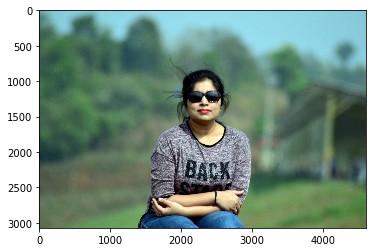

----------------------------------------------------------------------------------------------------
Hello, Human! you resemble: Cocker spaniel


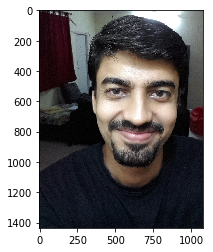

----------------------------------------------------------------------------------------------------
Wassup Dog! You are: Labrador retriever


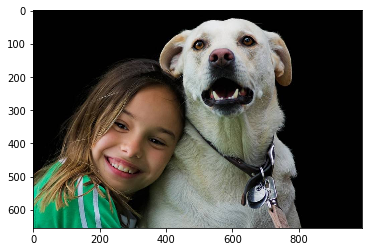

----------------------------------------------------------------------------------------------------
Neither dog nor human


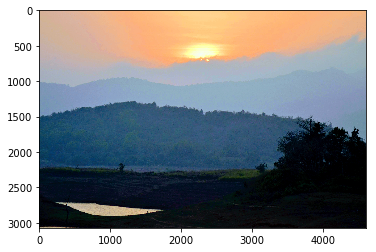

----------------------------------------------------------------------------------------------------
Wassup Dog! You are: Labrador retriever


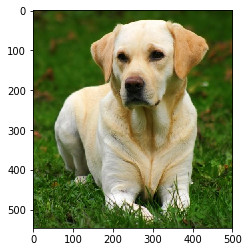

----------------------------------------------------------------------------------------------------
Wassup Dog! You are: Welsh springer spaniel


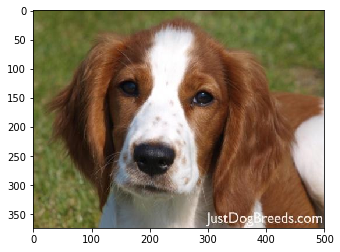

----------------------------------------------------------------------------------------------------


In [56]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

from IPython.display import Image
images = ['DSC_2374.jpg','beard.jpg','girl-hugging-dog.jpg','DSC_2316.jpg','Labrador_retriever_06457.jpg','Welsh_springer_spaniel_08203.jpg']
for img in images:
    run_app('images/' + img)
